In [1]:
from algorithm.louvain import louvain
from algorithm.spectral_clustering import spectral_clustering, normalized_spectral_clustering
from algorithm.hierarchical_clustering import mst_cut_clustering
from utils.analyze import get_rs_from_fixed_weighted_degree, compute_clustering, validation, metrics_to_df 

In [10]:
from scipy import stats
import pandas as pd
import numpy as np

# Experiment with kendal correlation estimation
Let's see what we've got with kendall instead of pearson

In [3]:
rs = get_rs_from_fixed_weighted_degree(degree=16, cluster_size= 20, num_clusters=2,r_out_bound = (0,1,100))

In [ ]:
true_labels, result, estimated_graphs_bags= compute_clustering(
    rs,
    algos=[spectral_clustering, normalized_spectral_clustering, louvain, mst_cut_clustering ],
    num_clusters = 2,
    cluster_size=20,
    sample_vol = 40,
    num_repeats=200,
    corr_estimator=stats.kendalltau)


100%|██████████| 4/4 [00:43<00:00, 11.00s/it]


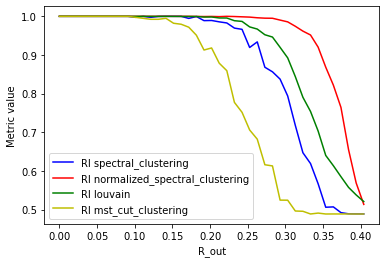

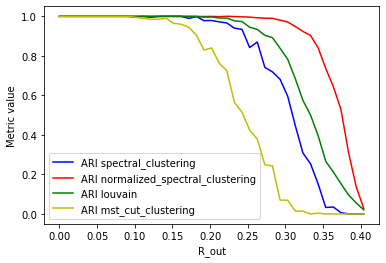

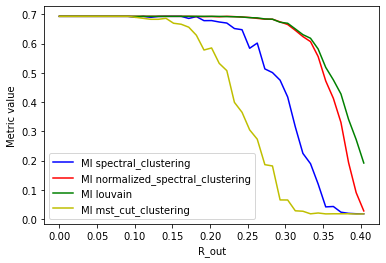

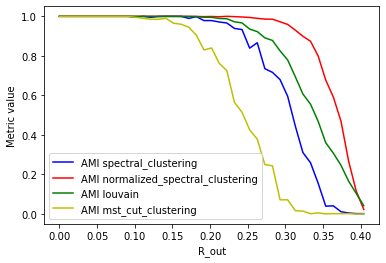

In [6]:
metrics40 = validation(rs, true_labels, result, estimated_graphs_bags, by_rin = False) 

df40 = metrics_to_df(metrics40, rs)

Generating graphs started


100%|██████████| 41/41 [16:53<00:00, 24.71s/it]


Generating graphs complete
spectral_clustering started


100%|██████████| 41/41 [00:30<00:00,  1.36it/s]


spectral_clustering complete
normalized_spectral_clustering started


100%|██████████| 41/41 [00:30<00:00,  1.35it/s]


normalized_spectral_clustering complete
louvain started


100%|██████████| 41/41 [00:36<00:00,  1.13it/s]


louvain complete
mst_cut_clustering started


100%|██████████| 41/41 [00:17<00:00,  2.29it/s]


mst_cut_clustering complete


100%|██████████| 4/4 [00:41<00:00, 10.30s/it]


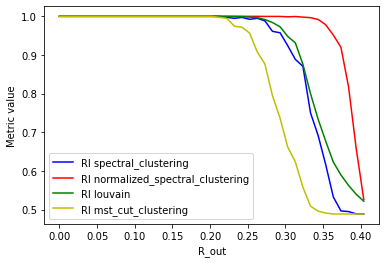

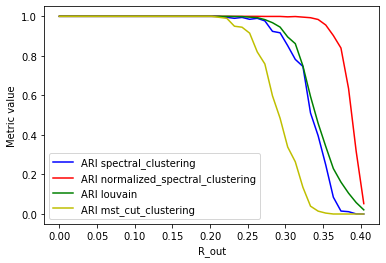

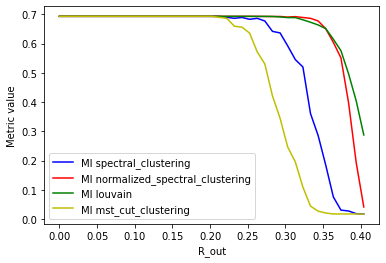

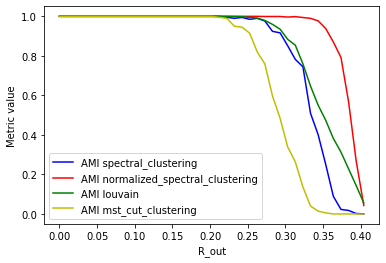

In [7]:
true_labels, result, estimated_graphs_bags= compute_clustering(
    rs,
    algos=[spectral_clustering, normalized_spectral_clustering, louvain, mst_cut_clustering ],
    num_clusters = 2,
    cluster_size=20,
    sample_vol = 80,
    num_repeats=200,
    corr_estimator=stats.kendalltau)

metrics80 = validation(rs, true_labels, result, estimated_graphs_bags, by_rin = False) 

df80 = metrics_to_df(metrics80, rs)
df80.to_csv('kendal_graph_40_degree16_sample_80_repeates400')

Generating graphs started


100%|██████████| 41/41 [14:53<00:00, 21.79s/it]


Generating graphs complete
spectral_clustering started


100%|██████████| 41/41 [00:29<00:00,  1.38it/s]


spectral_clustering complete
normalized_spectral_clustering started


100%|██████████| 41/41 [00:29<00:00,  1.38it/s]


normalized_spectral_clustering complete
louvain started


100%|██████████| 41/41 [00:36<00:00,  1.13it/s]


louvain complete
mst_cut_clustering started


100%|██████████| 41/41 [00:18<00:00,  2.26it/s]


mst_cut_clustering complete


100%|██████████| 4/4 [00:40<00:00, 10.21s/it]


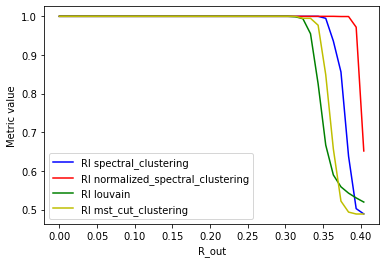

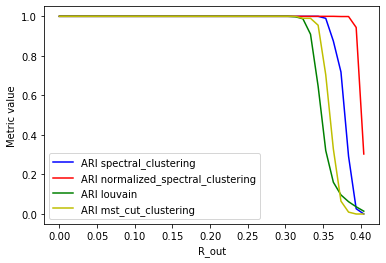

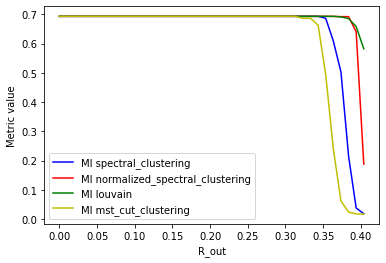

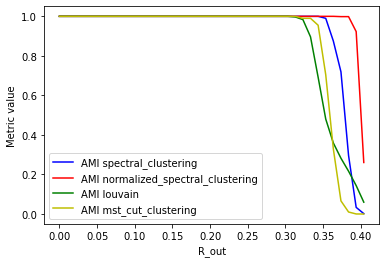

In [8]:
true_labels, result, estimated_graphs_bags= compute_clustering(
    rs,
    algos=[spectral_clustering, normalized_spectral_clustering, louvain, mst_cut_clustering ],
    num_clusters = 2,
    cluster_size=20,
    sample_vol = 400,
    num_repeats=200,
    corr_estimator=stats.kendalltau)

metrics400 = validation(rs, true_labels, result, estimated_graphs_bags, by_rin = False) 

df400 = metrics_to_df(metrics400, rs)
df400.to_csv('kendal_graph_degree16_sample_400_repeates400')

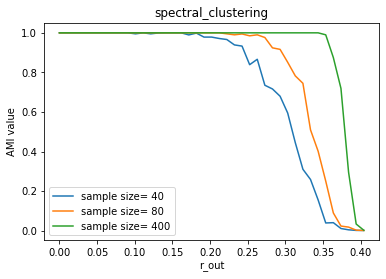

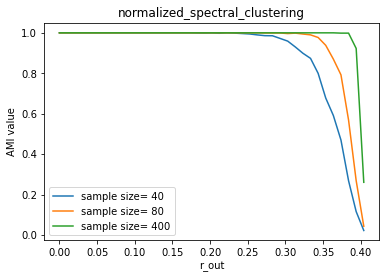

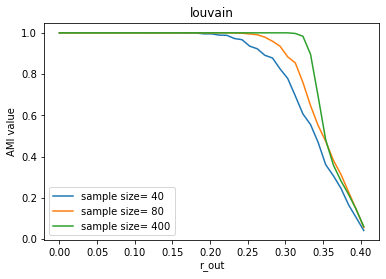

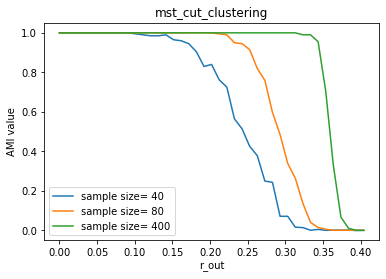

In [11]:
list(metrics40.keys())
metric = 'AMI'
for algo in metrics40.keys():
    df = pd.DataFrame(list(zip(rs[1], metrics40[algo][metric], metrics80[algo][metric], metrics400[algo][metric])), columns = ['r_out', 'sample size= 40', 'sample size= 80', 'sample size= 400']).set_index(['r_out'])
    df.plot(title=algo, ylabel = metric + ' value')

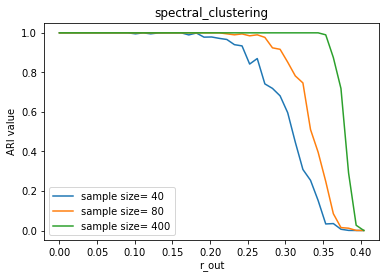

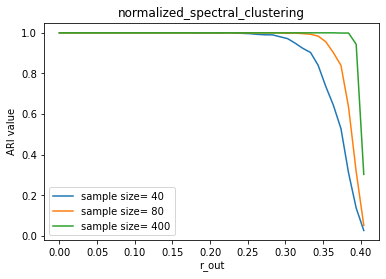

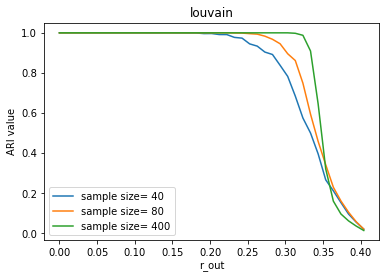

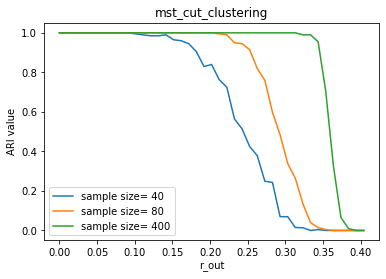

In [12]:
list(metrics40.keys())
metric = 'ARI'
for algo in metrics40.keys():
    df = pd.DataFrame(list(zip(rs[1], metrics40[algo][metric], metrics80[algo][metric], metrics400[algo][metric])), columns = ['r_out', 'sample size= 40', 'sample size= 80', 'sample size= 400']).set_index(['r_out'])
    df.plot(title=algo, ylabel = metric + ' value')

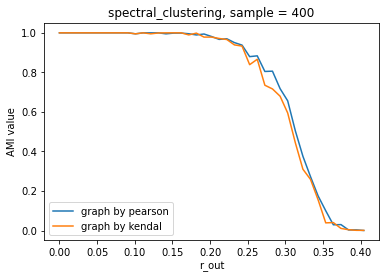

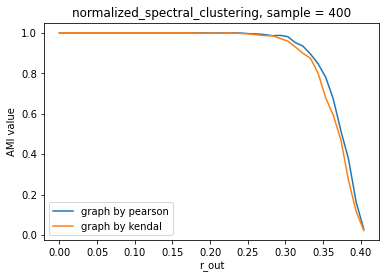

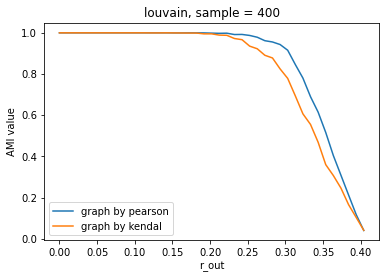

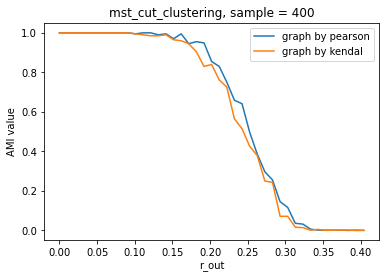

In [36]:
df40p = pd.read_csv('cached_results/\graph_40_degree16_sample_40_repeates400',header=[0, 1], index_col=0)
metric = 'AMI'
for algo in metrics40.keys():
    df = pd.DataFrame(list(zip(rs[1], df40p[algo][metric].values, df40[algo][metric].values)), columns = ['r_out', 'graph by pearson', 'graph by kendal']).set_index(['r_out'])
    df.plot(title=algo + ', sample = 400', ylabel = metric + ' value')

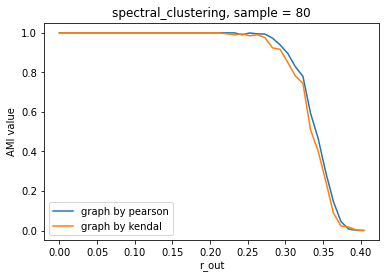

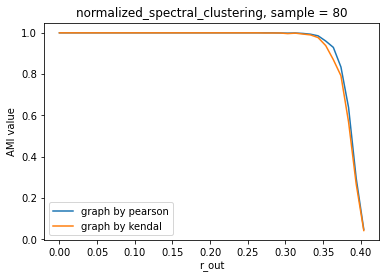

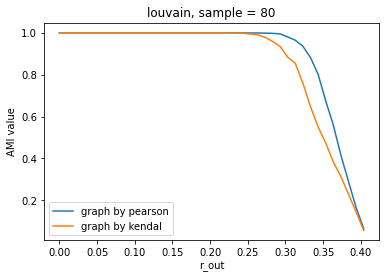

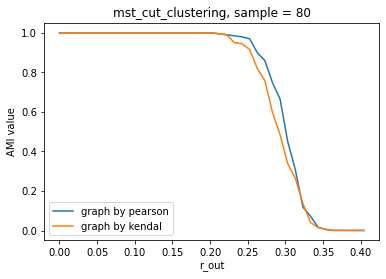

In [31]:
df80p = pd.read_csv('cached_results/\graph_40_degree16_sample_80_repeates400',header=[0, 1], index_col=0)
metric = 'AMI'
for algo in metrics40.keys():
    df = pd.DataFrame(list(zip(rs[1], df80p[algo][metric].values, df80[algo][metric].values)), columns = ['r_out', 'graph by pearson', 'graph by kendal']).set_index(['r_out'])
    df.plot(title=algo + ', sample = 80', ylabel = metric + ' value')

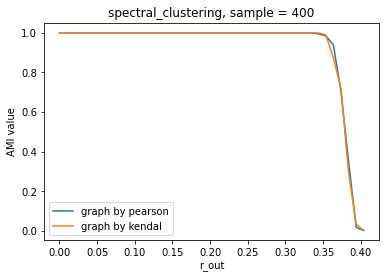

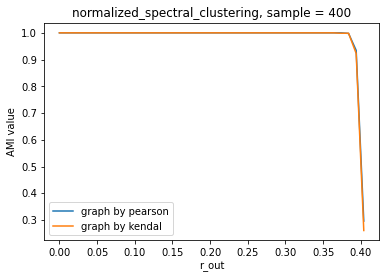

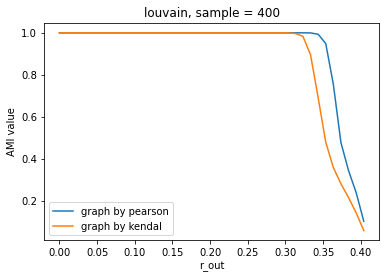

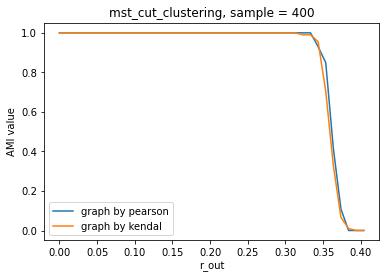

In [32]:
df400p = pd.read_csv('cached_results/\graph_degree16_sample_400_repeates400',header=[0, 1], index_col=0)
metric = 'AMI'
for algo in metrics40.keys():
    df = pd.DataFrame(list(zip(rs[1], df400p[algo][metric].values, df400[algo][metric].values)), columns = ['r_out', 'graph by pearson', 'graph by kendal']).set_index(['r_out'])
    df.plot(title=algo + ', sample = 400', ylabel = metric + ' value')